In [1]:
%matplotlib inline

# useful packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx
import time
import pandas as pd

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit.quantum_info import Statevector
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
import qiskit

In [20]:
# Cobyla(maxiter = 400)
markers = ["v", "2", "8", 's', 'p', 'P', '*', 'h', '+', 'X']
colors = ['dimgray', 'navy', 'cyan', 'palegreen', 'salmon', 
          'chocolate', 'darkorange', 'teal', 'darkviolet', 'gold']
seeds = np.linspace(201, 10000, 10000 - 200)

In [33]:
# graph drawer
def engineering_drawing(energy, marker, color, d):
    plt.figure(dpi = 300)
    plt.plot(seeds, df['energy'].tolist(), marker, color = color, label = 'Depth='+str(d+1))
    plt.legend()
    plt.title('reps='+str(d))
    plt.xlabel('Seeds')
    plt.ylabel('Energy')
    plt.grid()
    plt.savefig('/Users/youfuqian/My Drive/College/#Research/3.MaxCut and statistical physics/Comprehensive Long run/depths/'+str(d)+'.png')
    plt.show()

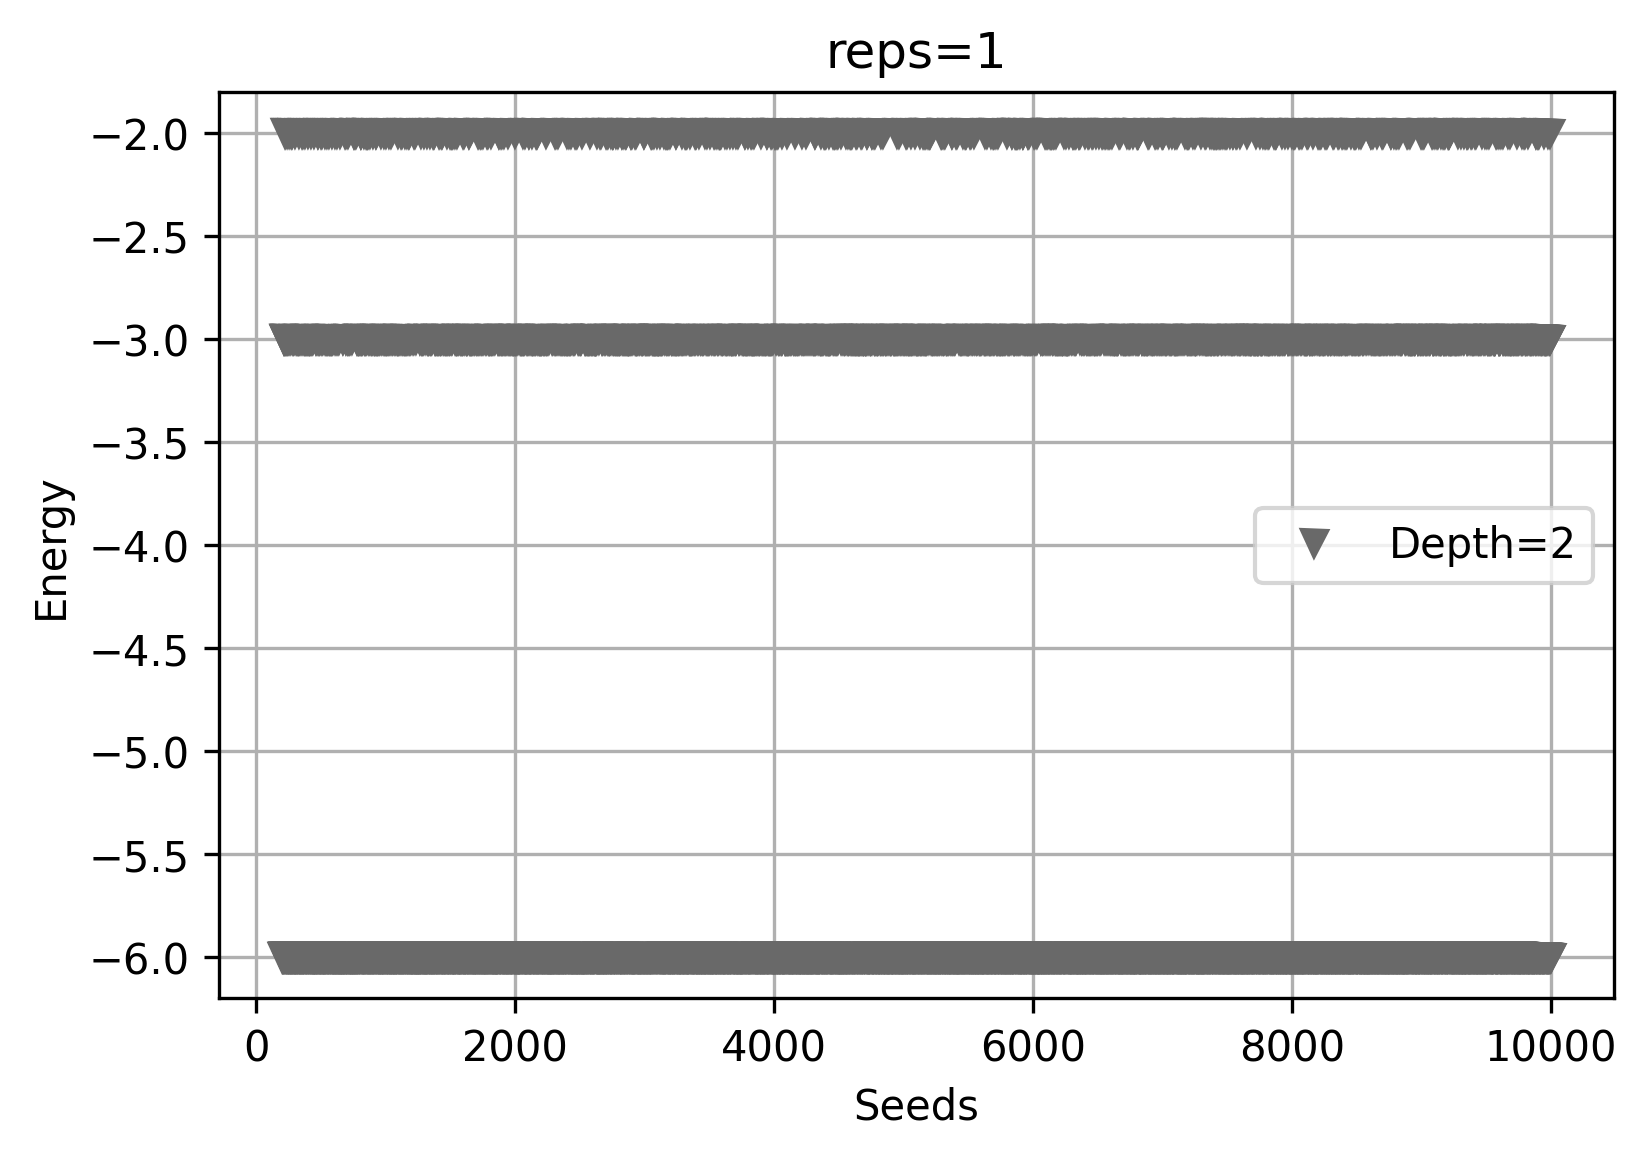

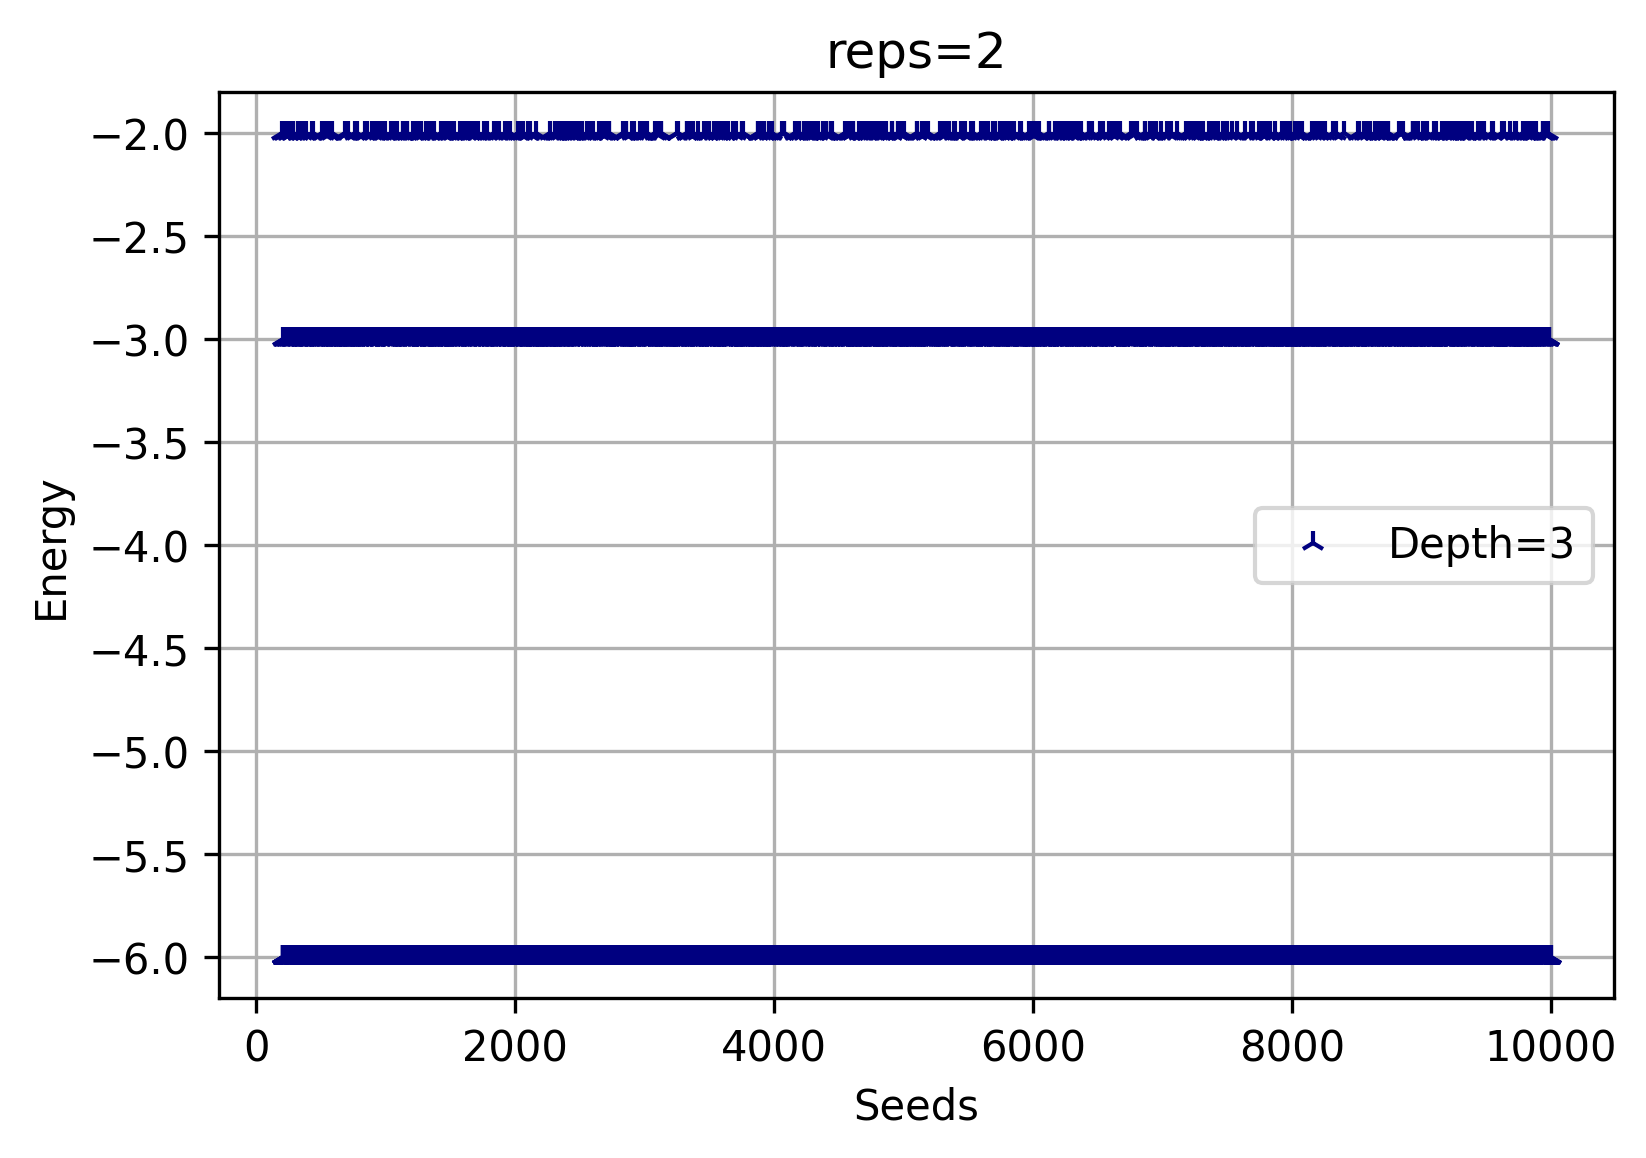

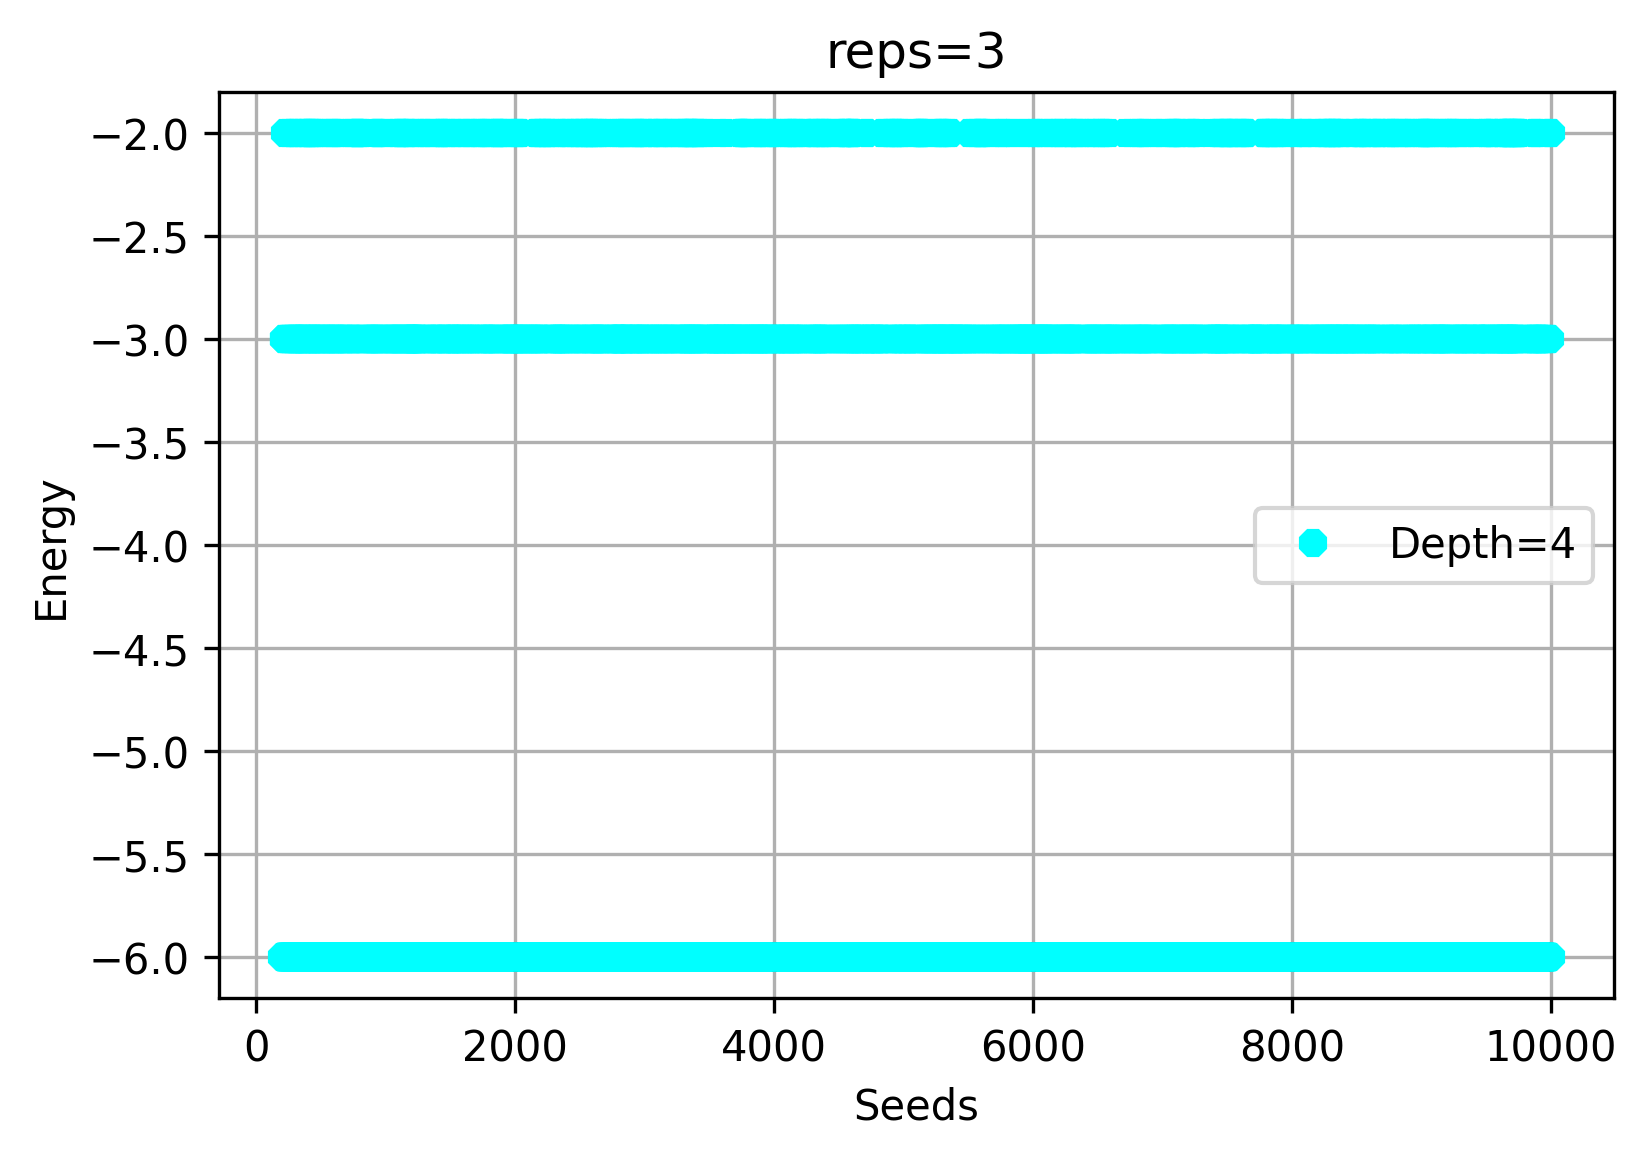

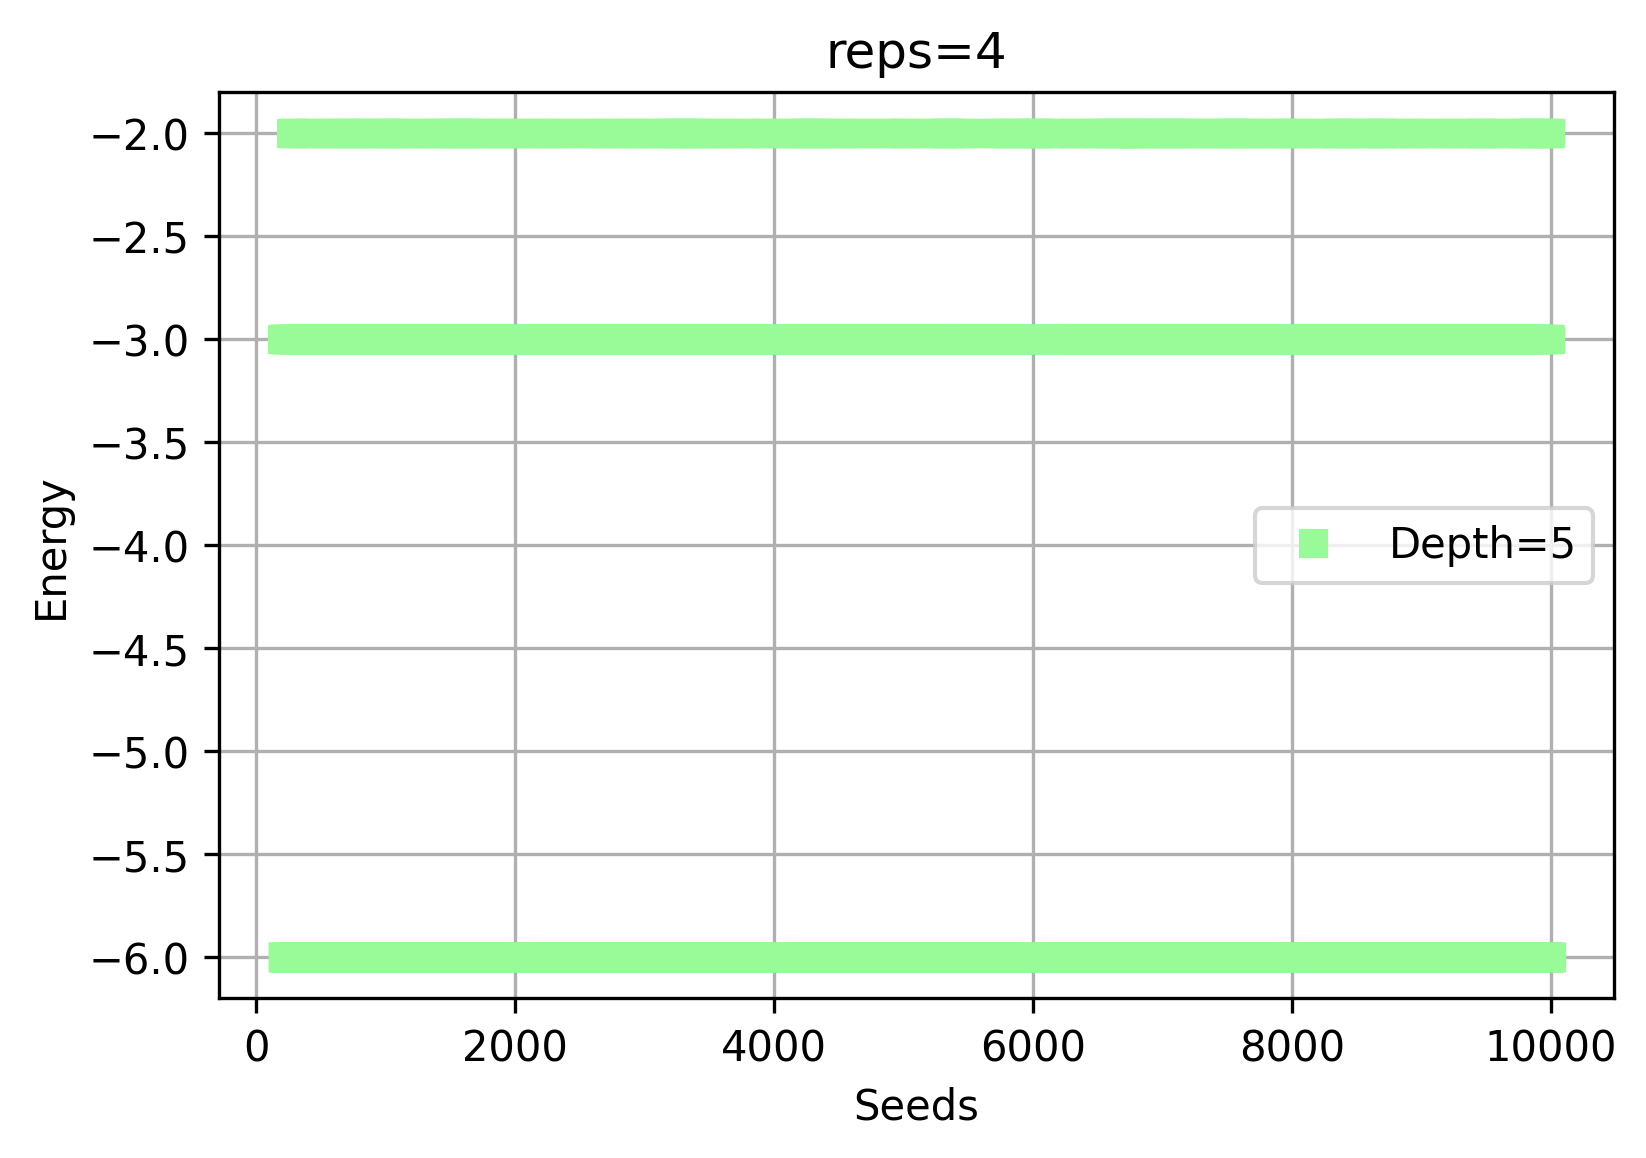

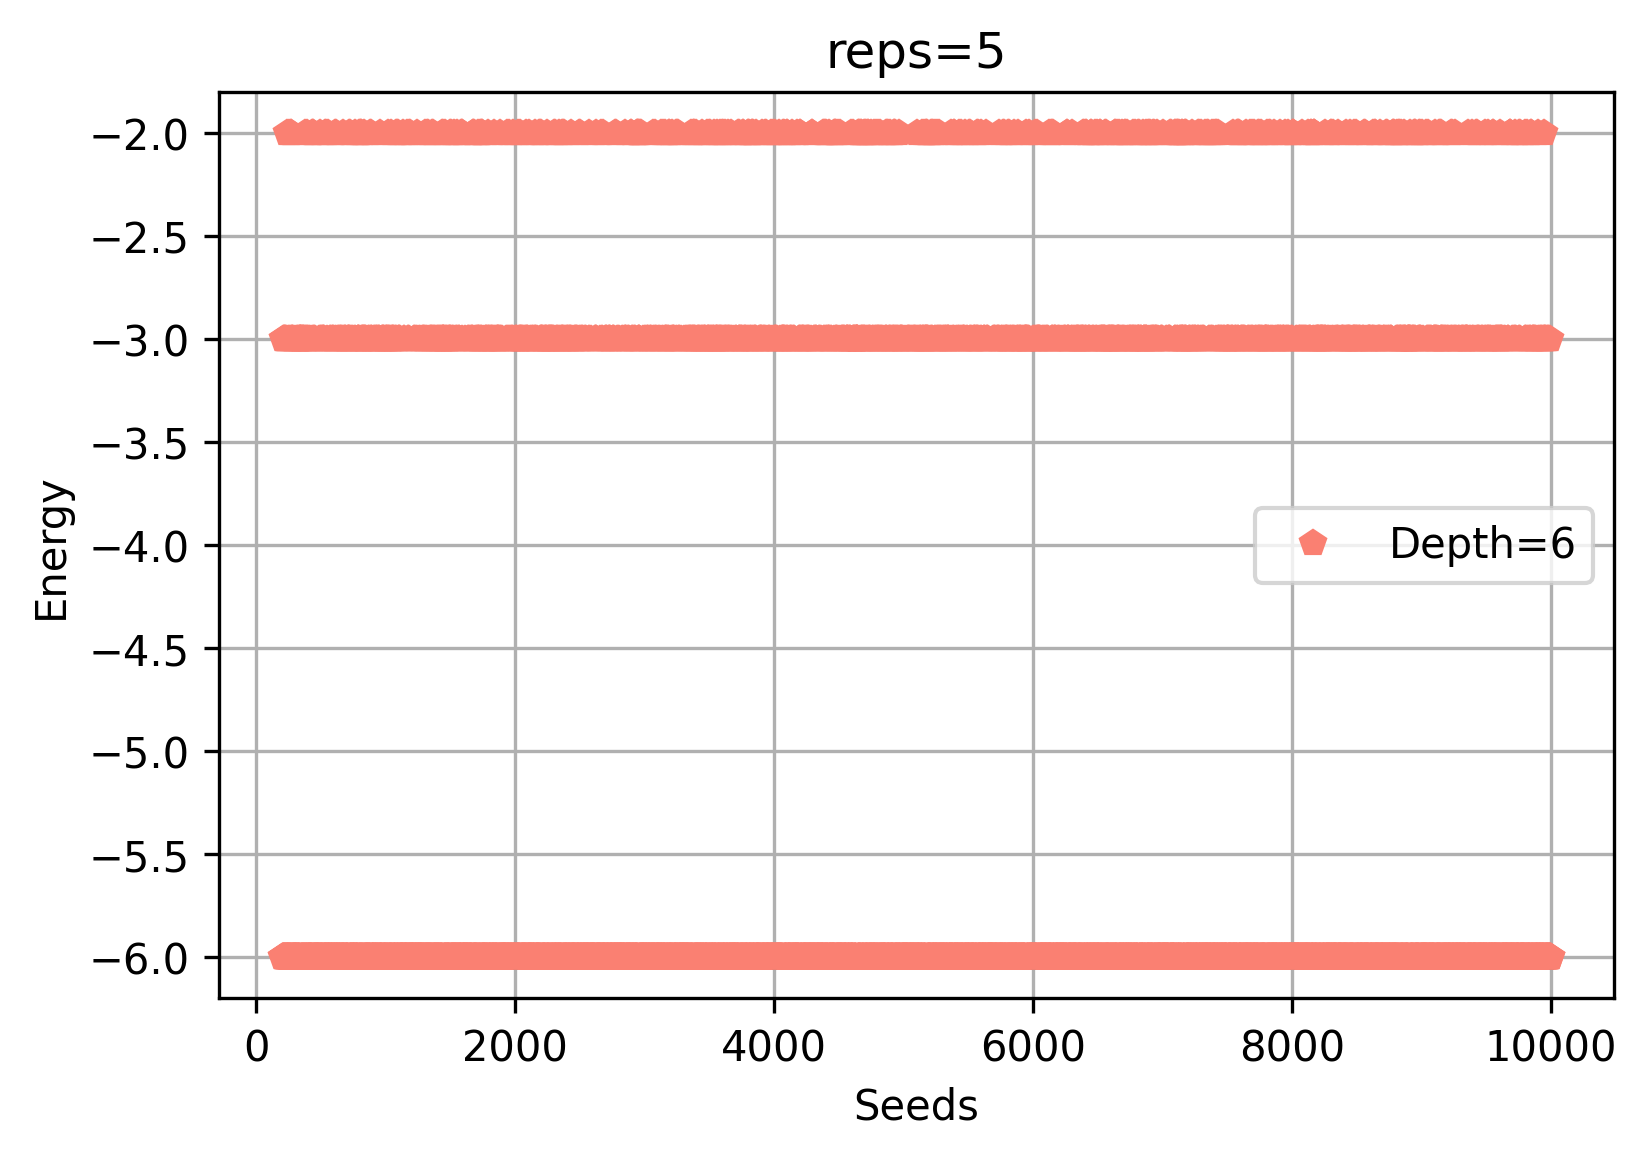

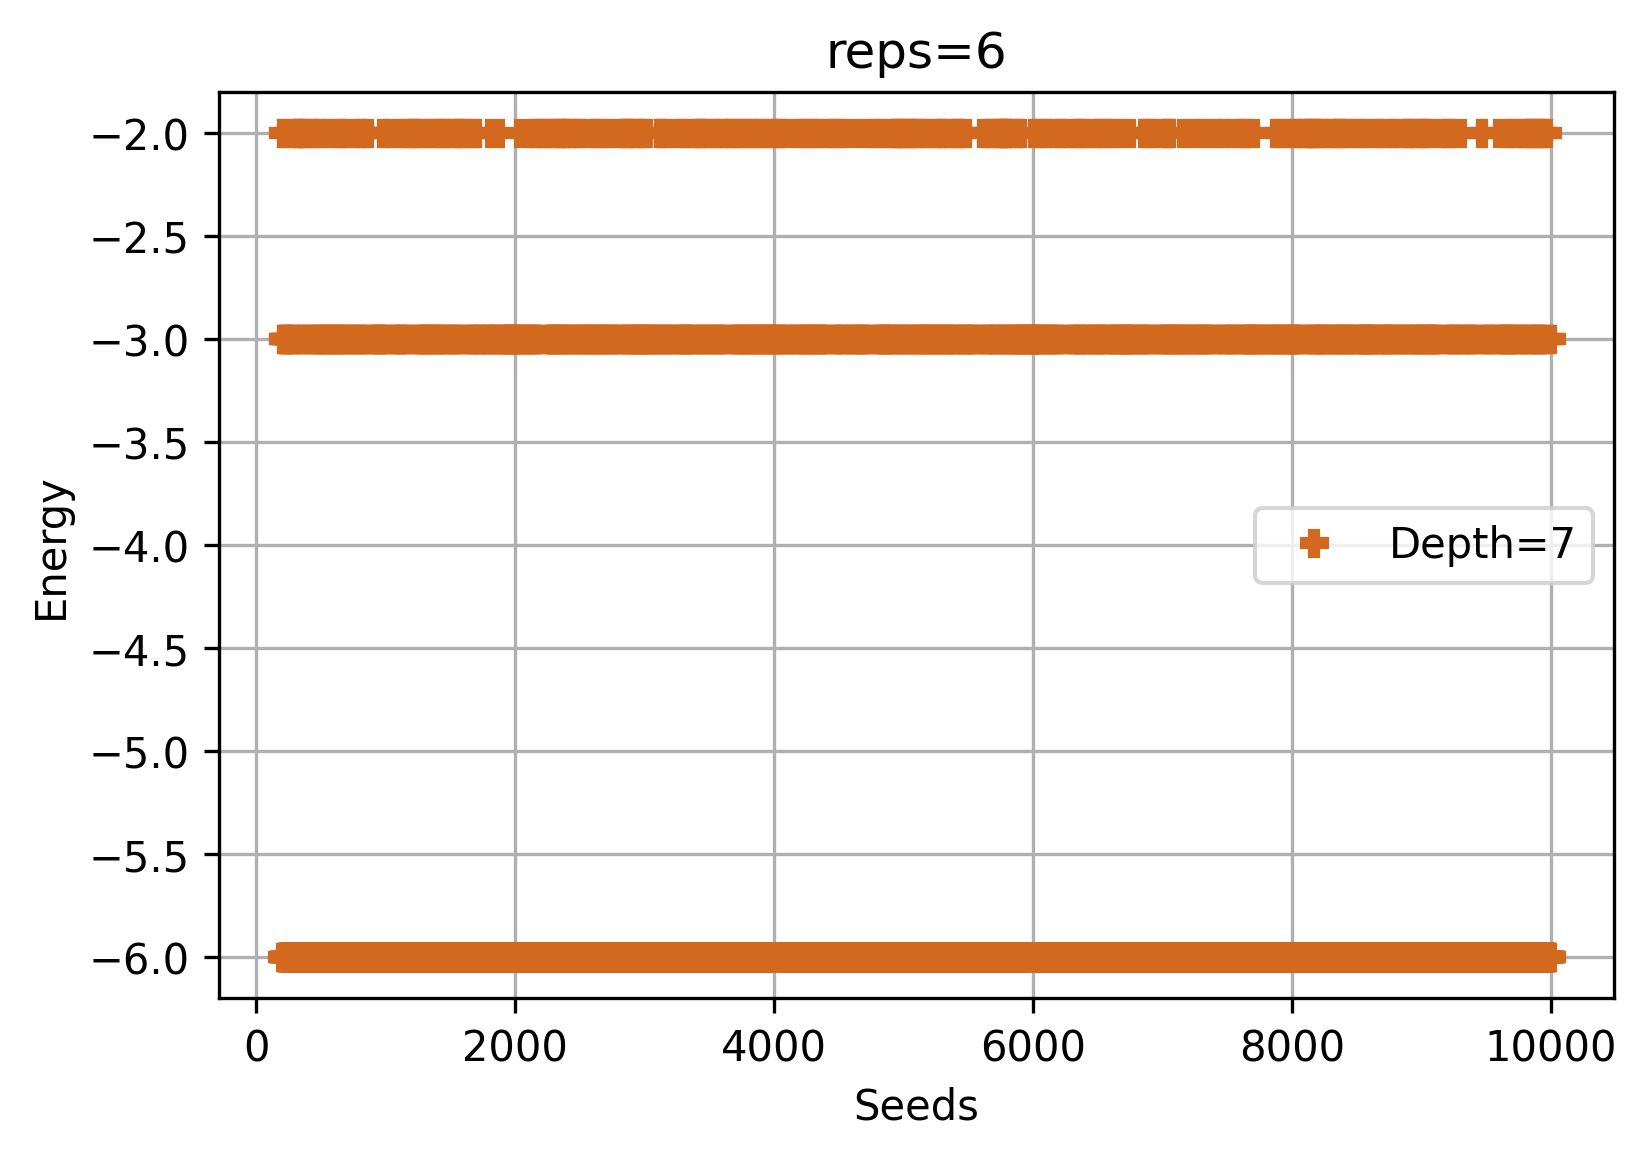

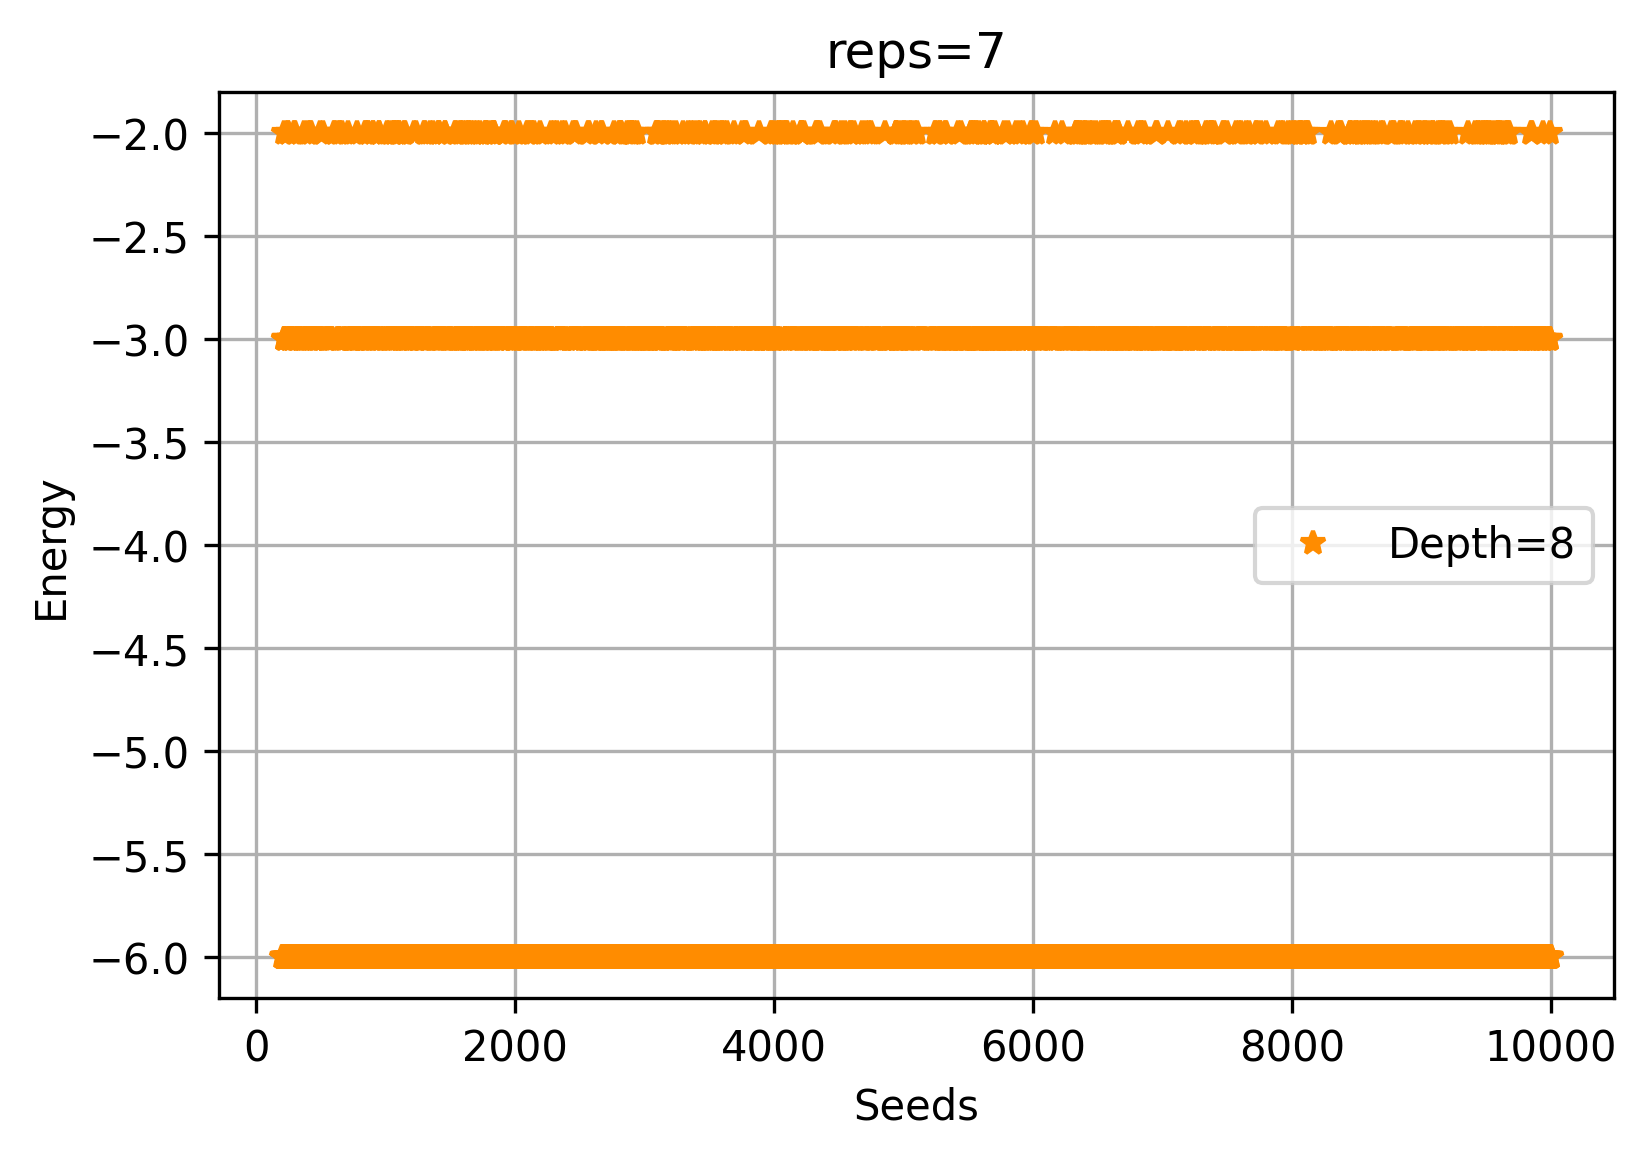

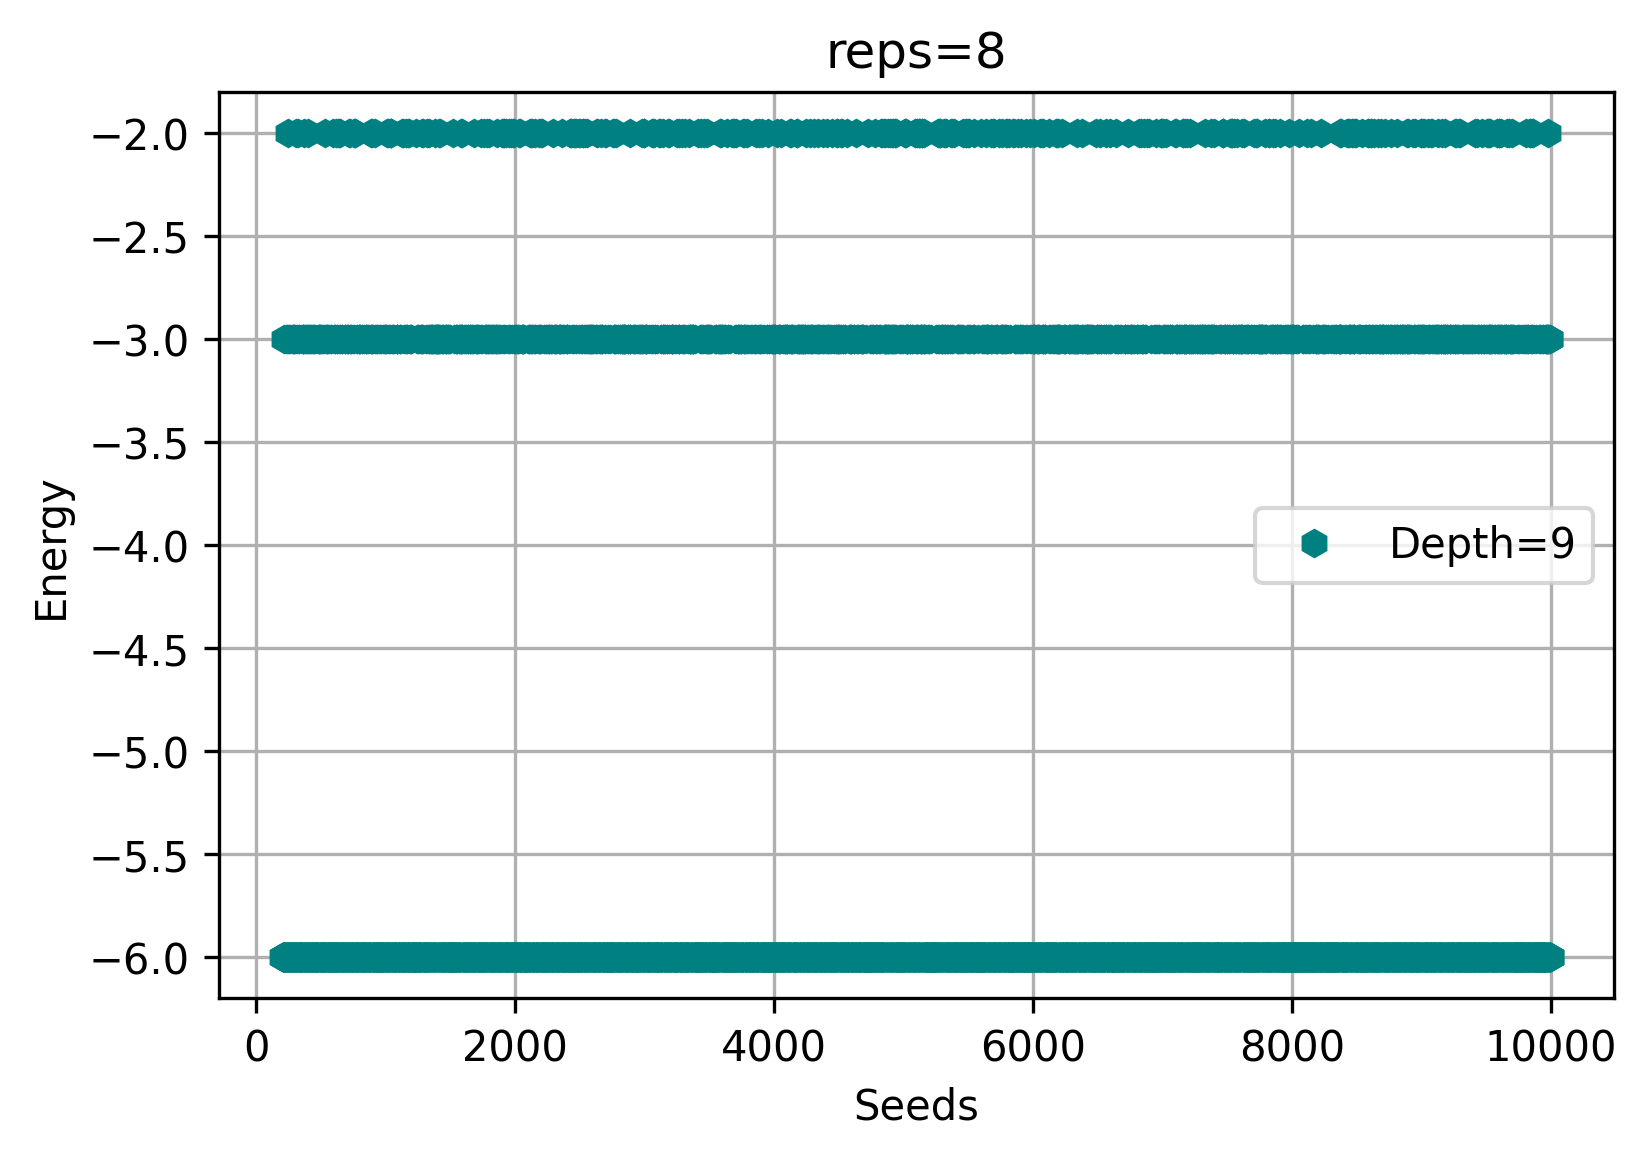

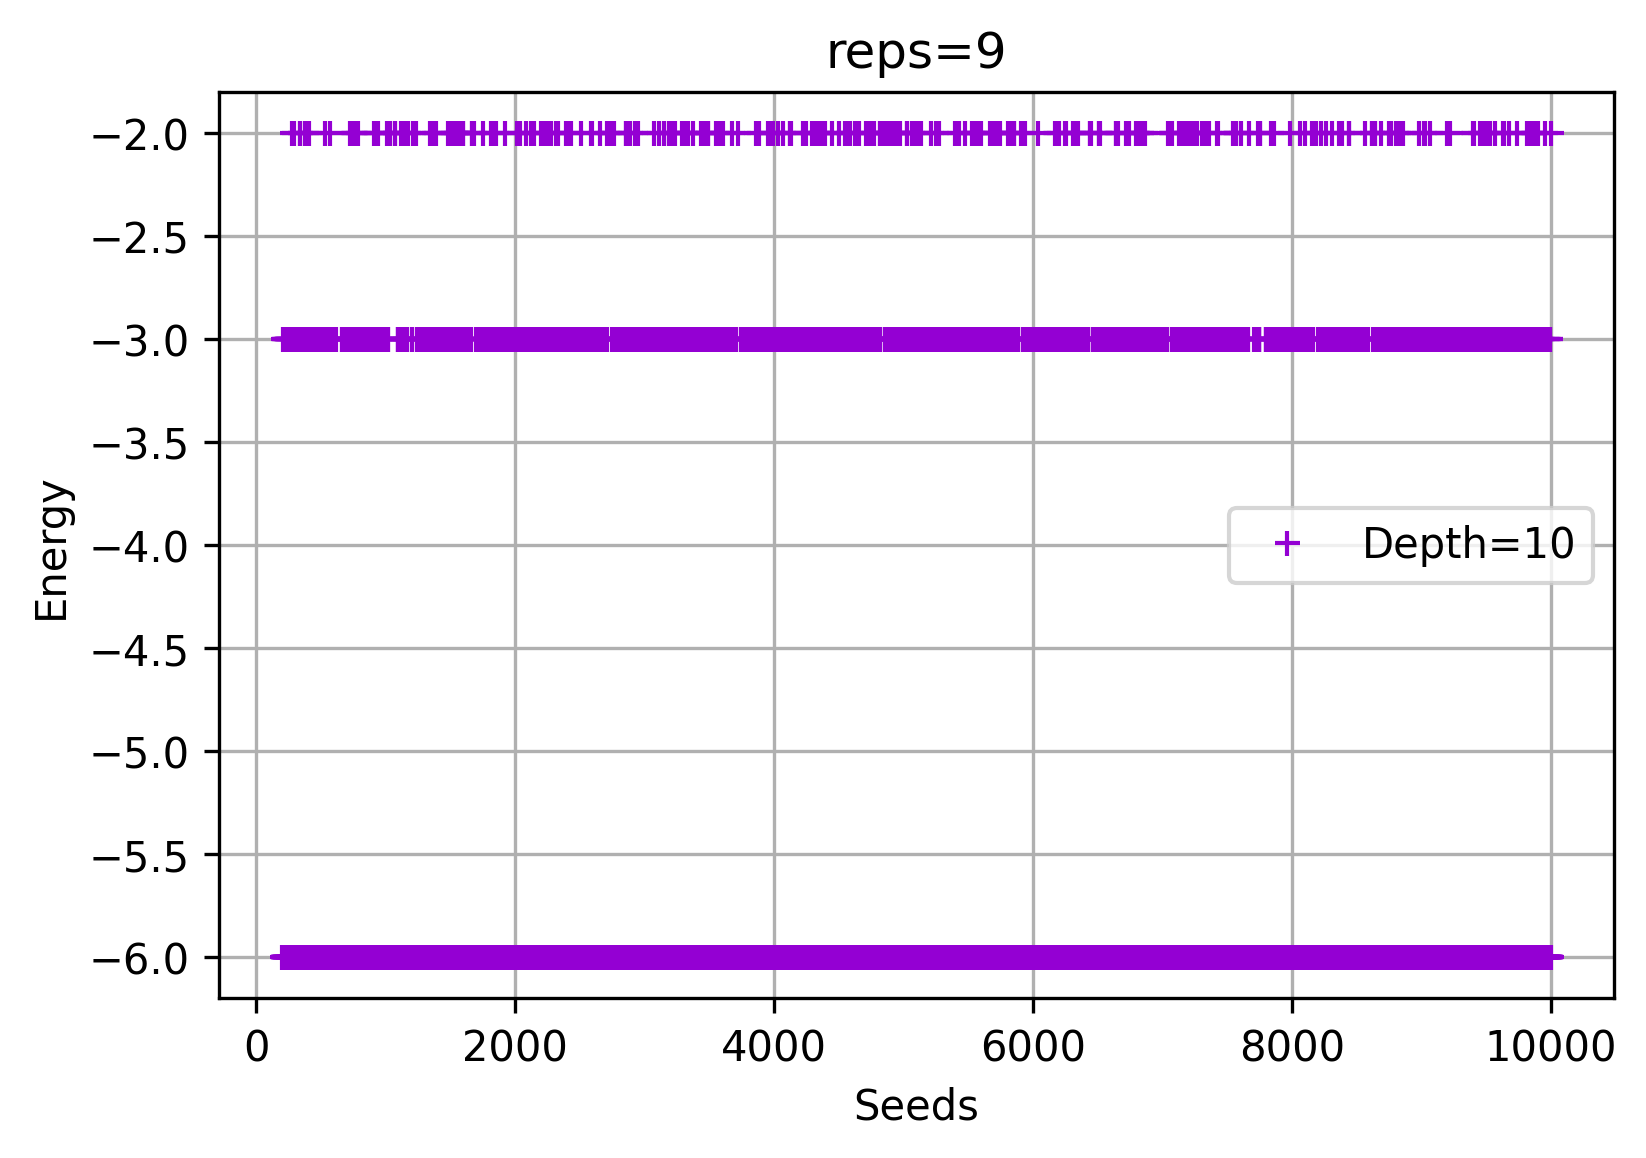

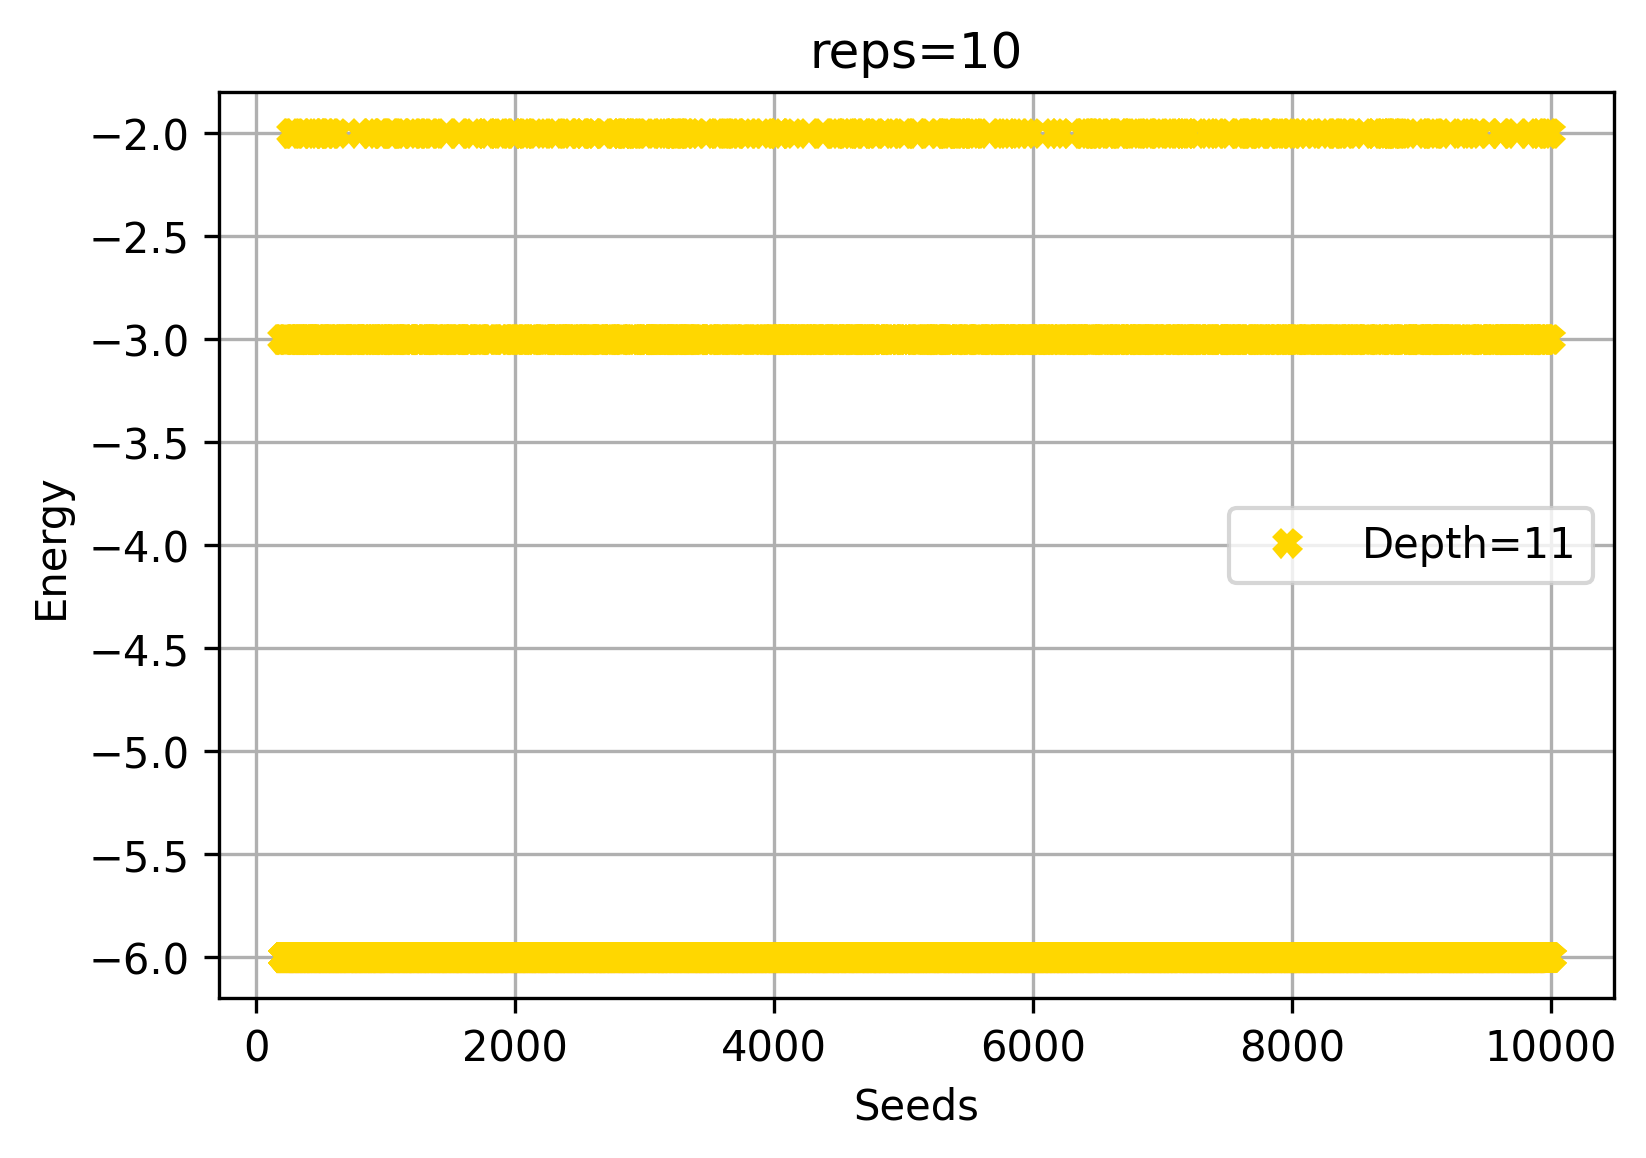

In [34]:
for d in range(1, 11):
    df = pd.read_excel('depths.xlsx', sheet_name='reps ='+str(d))
    energy = df['energy'].tolist()
    engineering_drawing(energy, markers[d-1], colors[d-1], d)

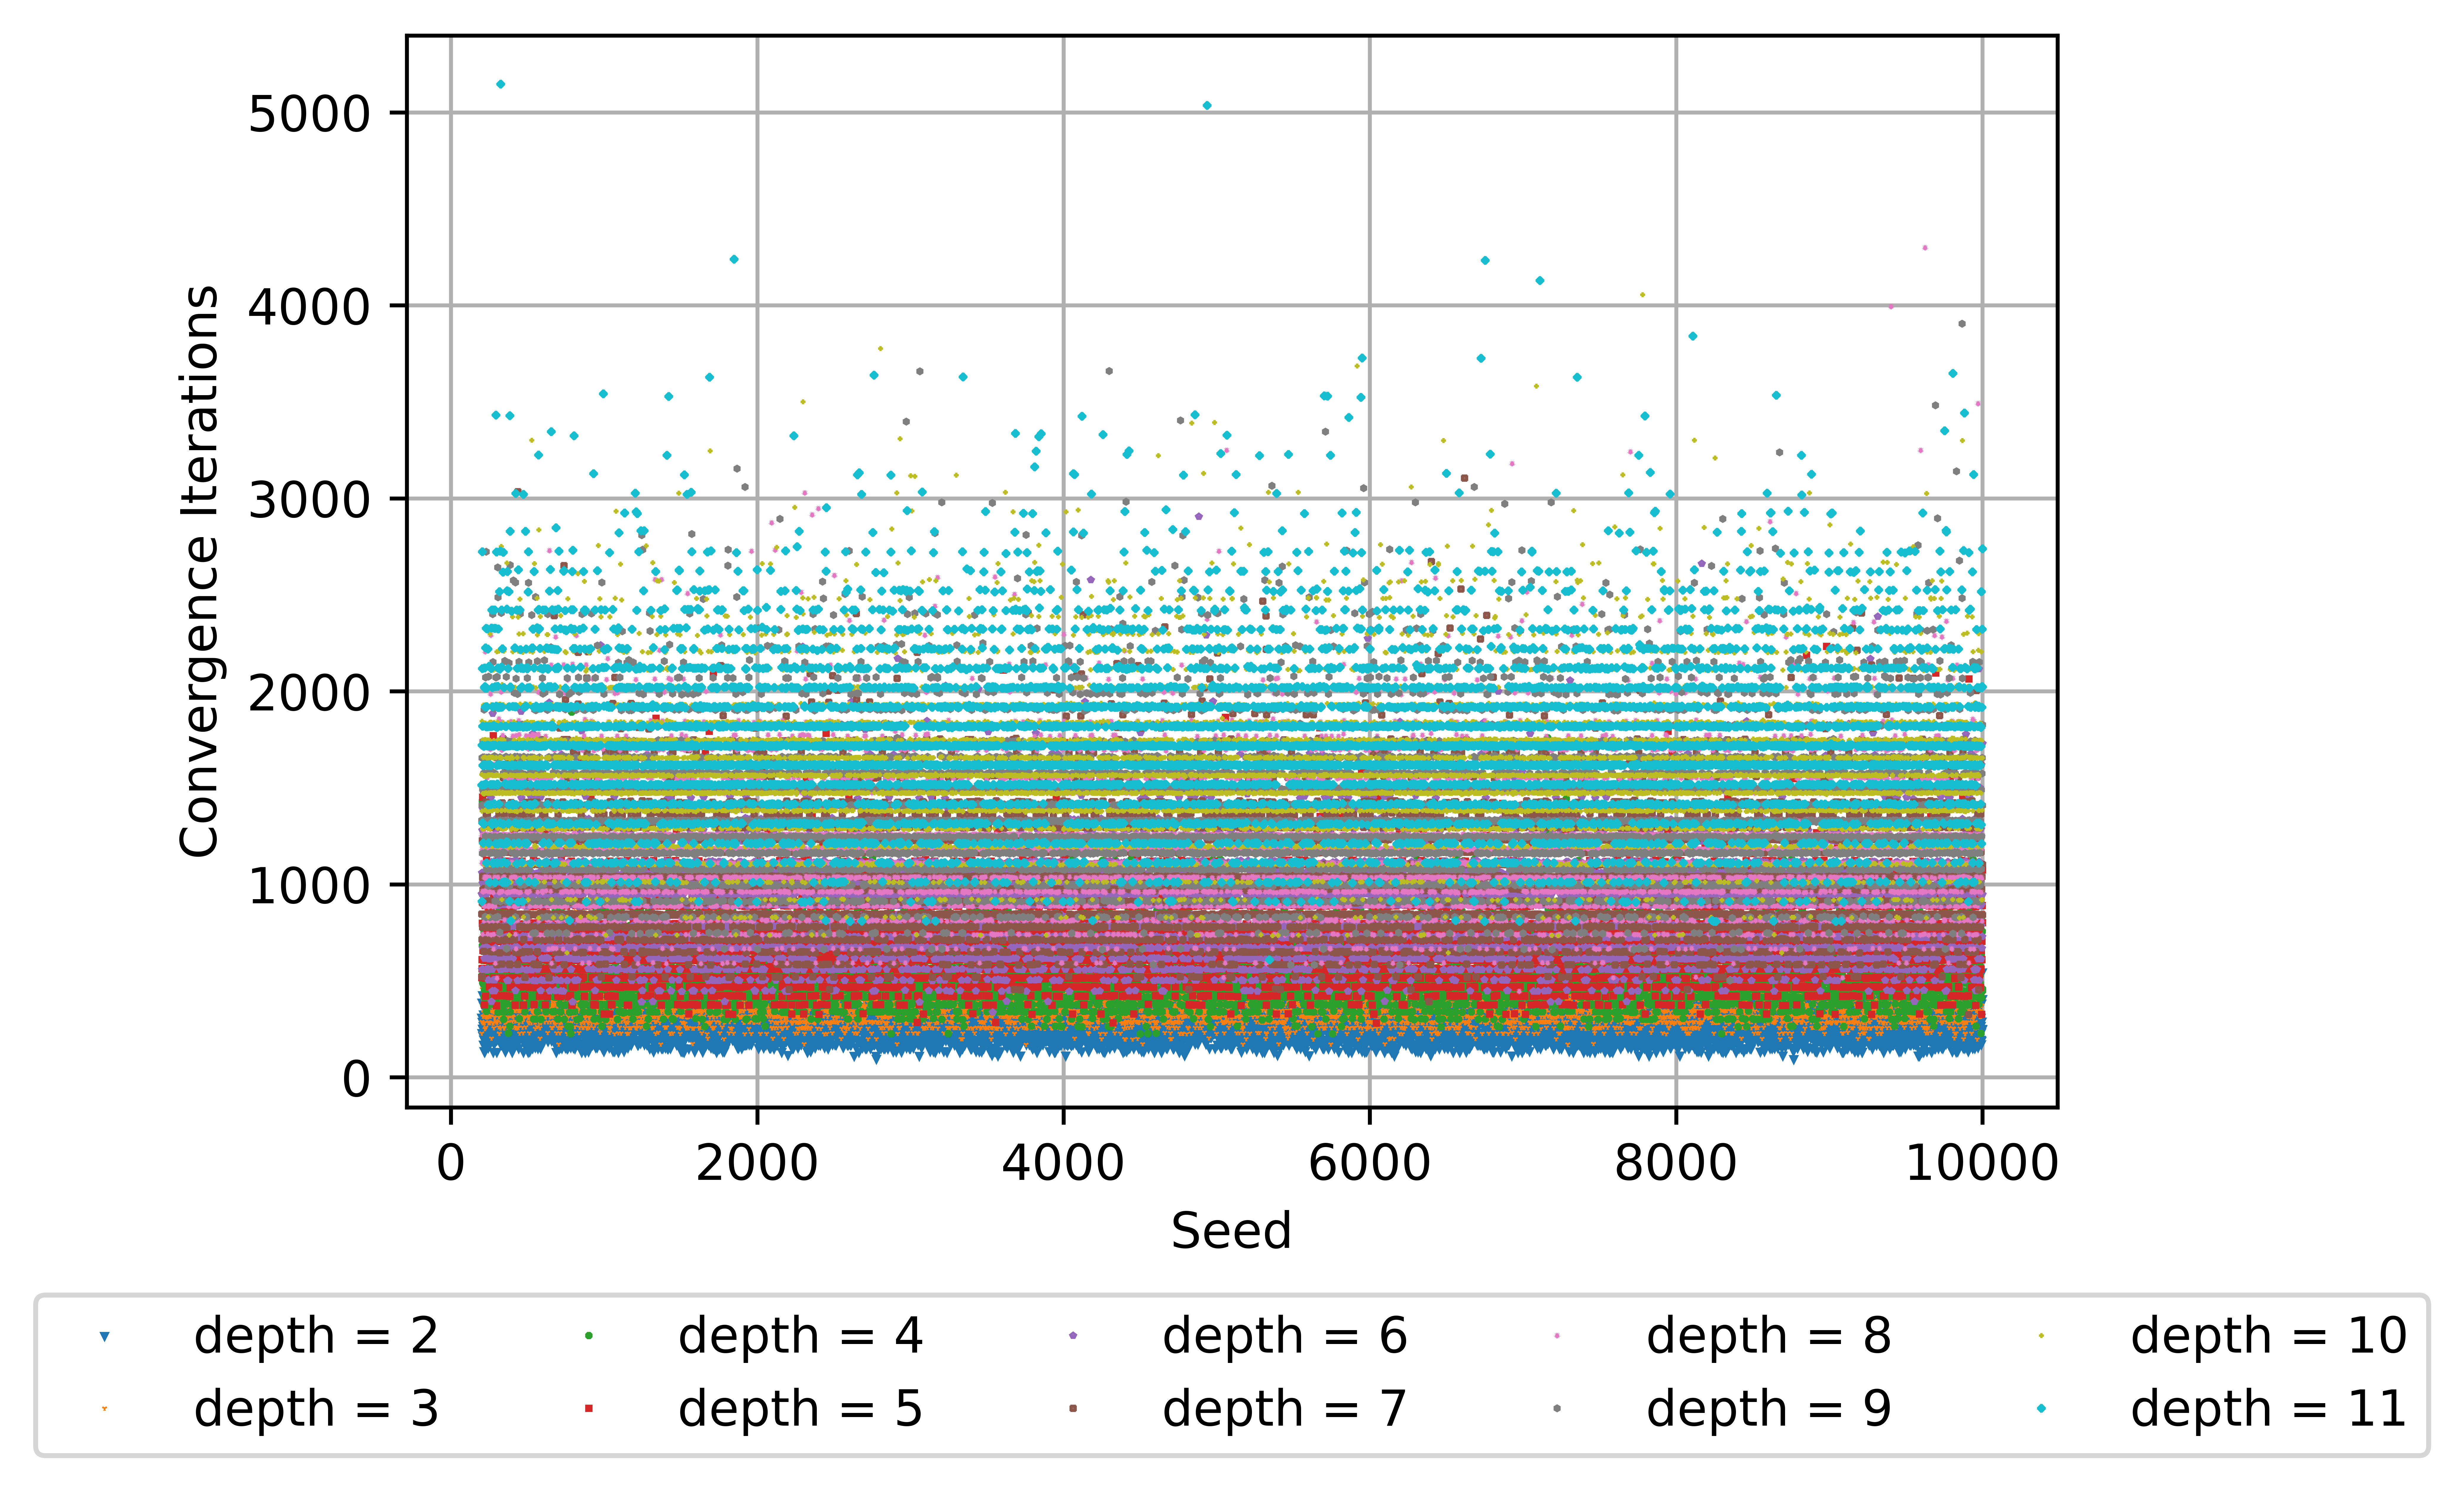

In [46]:
plt.figure(dpi = 1200)
for i in np.arange(1, 11):
    df = pd.read_excel('depths.xlsx', sheet_name='reps ='+str(i))
    plt.plot(seeds, df['terminate iterations'].tolist(), markers[i-1], markersize = .5,
            label='depth = ' + str(i+1))
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25), ncol=5)
plt.xlabel("Seed")
plt.ylabel("Convergence Iterations")
plt.grid()
plt.show()

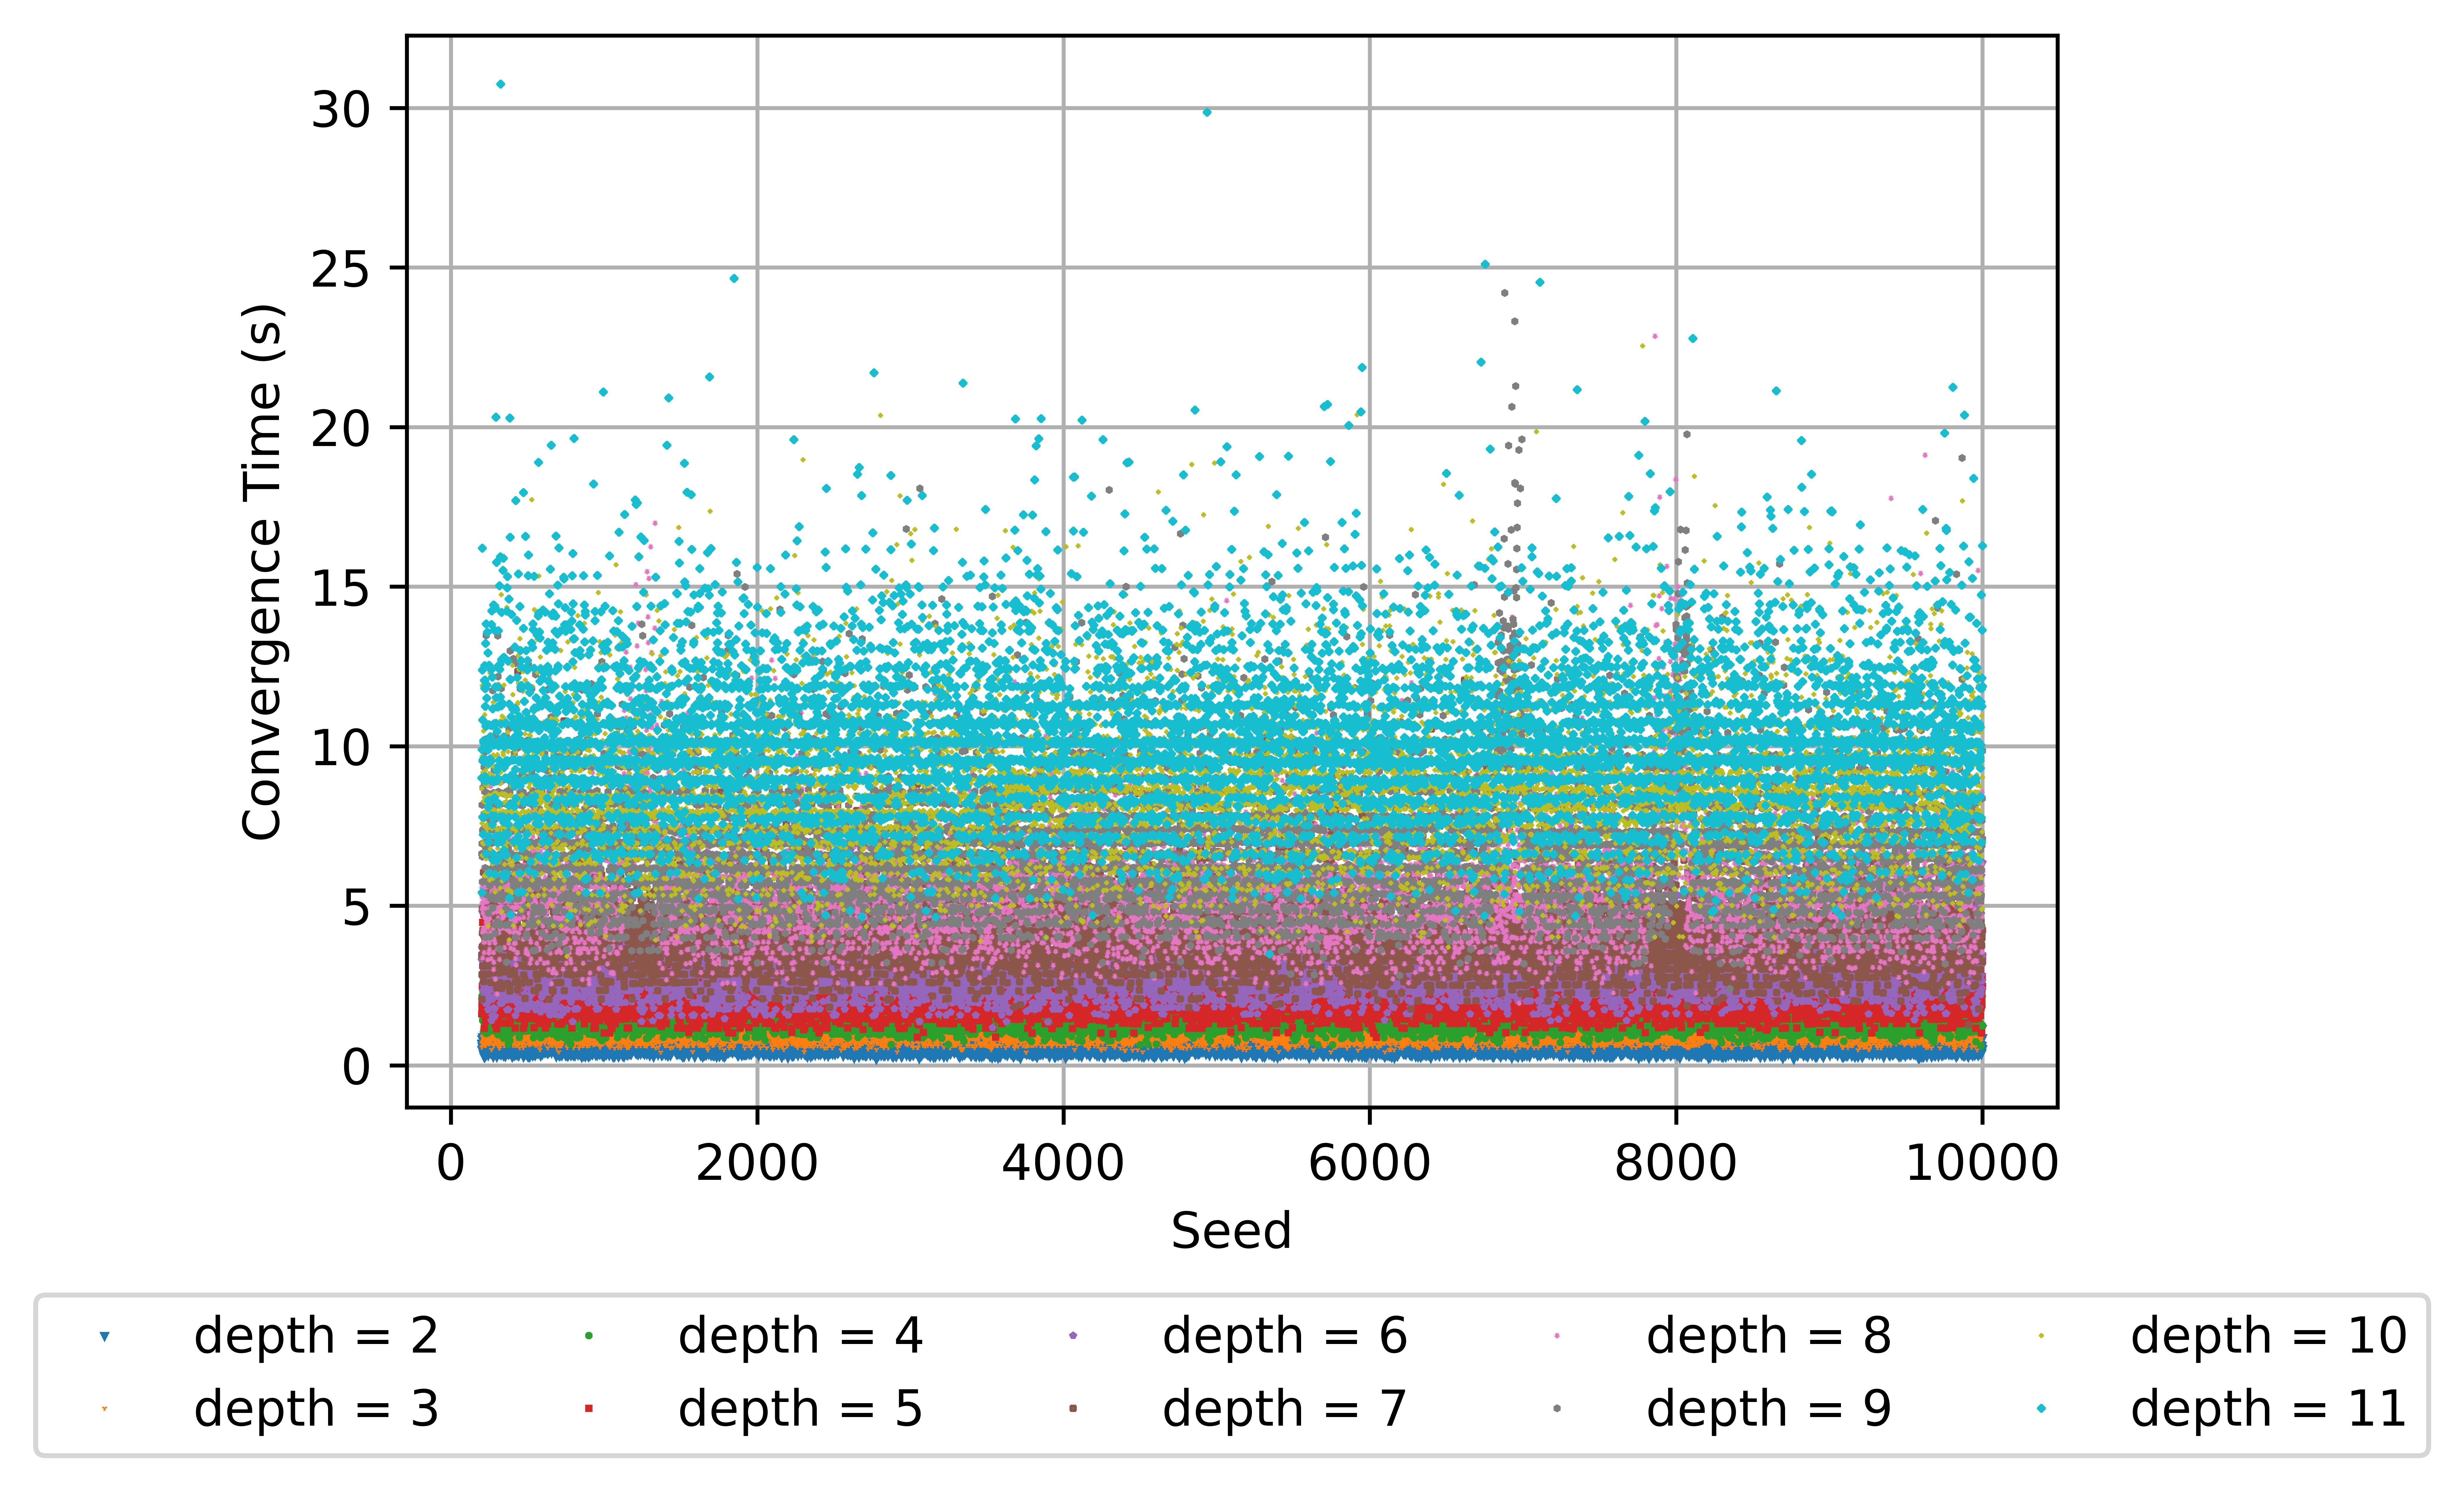

In [47]:
# execution time
plt.figure(dpi = 1200)
for i in np.arange(1, 11):
    df = pd.read_excel('depths.xlsx', sheet_name='reps ='+str(i))
    plt.plot(seeds, df['time (s)'].tolist(), markers[i-1], markersize = 0.5,
            label='depth = ' + str(i+1))
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25), ncol=5)
plt.xlabel("Seed")
plt.ylabel("Convergence Time (s)")
plt.grid()
plt.show()